In [57]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "./data/mouse_drug_data.csv"
clinical_trial_data_to_load = "./data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_data, clinical_data, on = "Mouse ID", how = "outer")

# Display the data table for preview
combined_data.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [58]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume = combined_data.groupby(["Drug", "Timepoint"]).mean() [["Tumor Volume (mm3)"]]

# Convert to DataFrame
mean_tumor_volume = pd.DataFrame(mean_tumor_volume)

# Preview DataFrame
mean_tumor_volume.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [59]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_errors = combined_data.groupby(["Drug", "Timepoint"]).sem()[["Tumor Volume (mm3)"]]

# Convert to DataFrame
standard_errors = pd.DataFrame(standard_errors)

# Preview DataFrame
standard_errors.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [60]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_volume_summary =  pd.pivot_table(mean_tumor_volume, index= "Timepoint", columns= "Drug", values= "Tumor Volume (mm3)")
standard_error_summary = pd.pivot_table(standard_errors, index= "Timepoint", columns= "Drug", values= "Tumor Volume (mm3)")

# Preview that Reformatting worked
mean_tumor_volume_summary
standard_error_summary

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


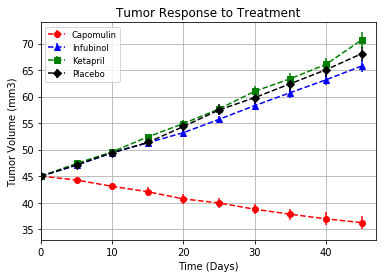

In [61]:
# Generate the Plot (with Error Bars)
x_axis = mean_tumor_volume_summary.index.tolist()

plt.errorbar(x_axis, mean_tumor_volume_summary["Capomulin"], yerr = standard_error_summary["Capomulin"], c="red", marker="o", linestyle = "dashed", label = "Capomulin")
plt.errorbar(x_axis, mean_tumor_volume_summary["Infubinol"], yerr = standard_error_summary["Infubinol"], c="blue",  marker="^", linestyle="dashed", label="Infubinol")
plt.errorbar(x_axis, mean_tumor_volume_summary["Ketapril"], yerr = standard_error_summary["Ketapril"], c="green",  marker="s", linestyle="dashed", label="Ketapril")
plt.errorbar(x_axis, mean_tumor_volume_summary["Placebo"], yerr = standard_error_summary["Placebo"], c="black",  marker="D", linestyle="dashed", label="Placebo")

plt.xlim(0, 47)
plt.ylim(33, 74)

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.legend(loc="best", fontsize="small", fancybox=True)

plt.grid()

# Save the Figure
plt.savefig("./Images/Tumor_Volume.png")
plt.show()

### Show the Figure
plt.show()

## Metastatic Response to Treatment

In [62]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_site = combined_data.groupby(["Drug", "Timepoint"]).mean() [["Metastatic Sites"]]

# Convert to DataFrame
mean_met_site = pd.DataFrame(mean_met_site)

# Preview DataFrame
mean_met_site.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [63]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_met_site = combined_data.groupby(["Drug", "Timepoint"]).sem() [["Metastatic Sites"]]

# Convert to DataFrame
sem_met_site = pd.DataFrame(sem_met_site)

# Preview DataFrame
sem_met_site.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [64]:
# Minor Data Munging to Re-Format the Data Frames
mean_met_summary =  pd.pivot_table(mean_met_site, index= "Timepoint", columns= "Drug", values="Metastatic Sites")
sem_met_summary =  pd.pivot_table(sem_met_site, index= "Timepoint", columns= "Drug", values="Metastatic Sites")

# Preview that Reformatting worked
sem_met_summary

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


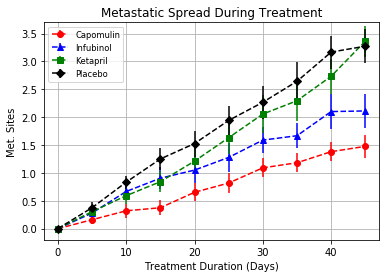

In [65]:
# Generate the Plot (with Error Bars)
plt.errorbar(x_axis, mean_met_summary["Capomulin"], yerr = sem_met_summary["Capomulin"], c="red", marker="o", linestyle = "dashed", label = "Capomulin")
plt.errorbar(x_axis, mean_met_summary["Infubinol"], yerr = sem_met_summary["Infubinol"], c="blue",  marker="^", linestyle="dashed", label="Infubinol")
plt.errorbar(x_axis, mean_met_summary["Ketapril"], yerr = sem_met_summary["Ketapril"], c="green",  marker="s", linestyle="dashed", label="Ketapril")
plt.errorbar(x_axis, mean_met_summary["Placebo"], yerr = sem_met_summary["Placebo"], c="black",  marker="D", linestyle="dashed", label="Placebo")

plt.xlim(-2, 47)
plt.ylim(-.2, 3.7)

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")

plt.legend(loc="best", fontsize="small", fancybox=True)

plt.grid()

# Save the Figure
plt.savefig("./Images/Metastatic_Spread.png")

# Show the Figure
plt.show()

## Survival Rates

In [66]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = combined_data.groupby(["Drug", "Timepoint"]).nunique()[["Mouse ID"]]

# Convert to DataFrame
mice_count = pd.DataFrame(mice_count)
mice_count = mice_count.rename(columns= {"Mouse ID": "Mouse Count"})

# Preview DataFrame
mice_count.head()


Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [67]:
# Minor Data Munging to Re-Format the Data Frames
mice_count_summary =  pd.pivot_table(mice_count, index= "Timepoint", columns= "Drug", values="Mouse Count")
# Preview the Data Frame
mice_count_summary

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


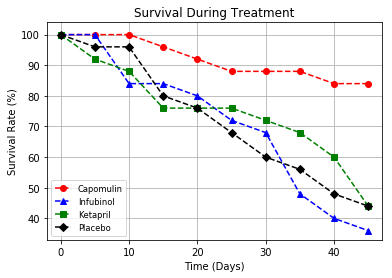

In [68]:
# Generate the Plot (Accounting for percentages)
plt.plot(x_axis, (mice_count_summary["Capomulin"]/mice_count_summary.loc[0, "Capomulin"])*100, c="red", marker="o", linestyle="dashed", label = "Capomulin")
plt.plot(x_axis, (mice_count_summary["Infubinol"]/mice_count_summary.loc[0, "Infubinol"])*100, c="blue",  marker="^", linestyle="dashed", label="Infubinol")
plt.plot(x_axis, (mice_count_summary["Ketapril"]/mice_count_summary.loc[0, "Ketapril"])*100, c="green",  marker="s", linestyle="dashed", label="Ketapril")
plt.plot(x_axis, (mice_count_summary["Placebo"]/mice_count_summary.loc[0, "Placebo"])*100, c="black",  marker="D", linestyle="dashed", label="Placebo")

plt.xlim(-2, 47)
plt.ylim(33, 104)

plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")

plt.legend(loc="best", fontsize="small", fancybox=True)

plt.grid()

# Save the Figuredata
plt.savefig("./Images/Mouse_Count.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [69]:
# Calculate the percent changes for each drug
percent_change = ((mean_tumor_volume_summary.loc[45, :] - mean_tumor_volume_summary.loc[0, :]) / mean_tumor_volume_summary.loc[0, :])*100


# Display the data to confirm
percent_change


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

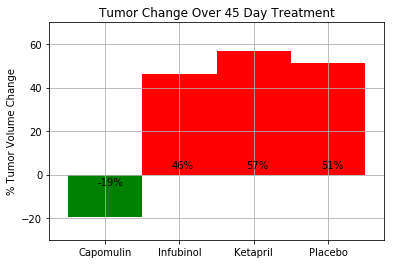

In [70]:
# Store all Relevant Percent Changes into a Tuple
relevant_percent_change = percent_change[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]
relevant_percent_change

# Splice the data between passing and failing drugs
#plt.bar(np.arange(0, len(relevant_percent_change), 1), relevant_percent_change, alpha=0.5, align="center")
mask1 = relevant_percent_change < 0
mask2 = relevant_percent_change >= 0

plt.bar(np.arange(0, len(relevant_percent_change))[mask1], relevant_percent_change[mask1], color = "green", width=1)
plt.bar(np.arange(0, len(relevant_percent_change))[mask2], relevant_percent_change[mask2], color = "red", width=1)

# Orient widths. Add labels, tick marks, etc. 
plt.xlim(-0.75, len(relevant_percent_change)-0.25)
plt.ylim(-30, 70)
plt.grid()

plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")

tick_locations = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
plt.xticks(np.arange(0, len(relevant_percent_change), 1),["Capomulin", "Infubinol", "Ketapril", "Placebo"])

# Use functions to label the percentages of changes
# Call functions to implement the function calls
for a, b in zip (np.arange(len(relevant_percent_change)), relevant_percent_change):
    if b > 0:
        plt.text(a-0.1,b-b+3,str(int(b))+"%")
    else:
        plt.text(a-0.1,b-b-5,str(int(b))+"%")

# Save the Figure
plt.savefig("./Images/Summary_Bar_Graph.png")

# Show the Figure
plt.show()